# Dublin Air Pollution
#### [ Programming for Data Analysis Project GMIT 2020 ]
<br>

<img align="left" width="340" src="http://airtoxenviro.com/wp-content/uploads/2015/05/Power-Plant-Clip-Art.png">

<br><br><br><br><br><br><br><br><br><br><br><br><br><br>
_Completed by:_ Olga Rozhdestvina (G00387844@gmit.ie)

___

Air pollution is a mixture of solid and gas particles in the air. Every year it causes approximately seven million premature deaths [1]. As air pollution levels increase, there has been a growing interest in modelling the relationship between atmospheric concentration of pollutants and various meteorological conditions in the area studied. [2]

The Air Quality Index, or AQI, is used for measuring the real-time pollution. The higher it is, the greater the level of air pollution. AQI is based on measurement of:

* **NO2** - nitrogen dioxide, 
* **PM10** - particulate matter with a diameter of less than 2.5 micrometers,
* **PM2.5** - particulate matter with a diameter of less than 2.5 micrometers,
* **O3** - ozone,
* **SO2** - sulfur dioxide.

_AQI_ variable is a non-negative integer, _NO2, PM10, PM2.5, O3, SO2, wind_ are non-negative real numbers with one decimal place, is_weekend is a categorical variable with 2 possible values: weekday and weekend. 

> 1. [WHO: Air Pollution](https://www.who.int/health-topics/air-pollution#:~:text=The%20combined%20effects%20of%20ambient,cancer%20and%20acute%20respiratory%20infections.)
2. [Joanna A. Kaminska: Probabilistic Forecasting of Nitrogen Dioxide Concentrations at an Urban Road Intersection](https://www.researchgate.net/publication/328978359_Probabilistic_Forecasting_of_Nitrogen_Dioxide_Concentrations_at_an_Urban_Road_Intersection)

<br>

#### General Set Up

In [1]:
# Dataframes
import pandas as pd
# Calculations and distributions
import numpy as np
# For categorical variable
from datetime import datetime
# Plotting
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import seaborn as sns

%matplotlib inline

In [2]:
# Colour scheme and styles for plots.
sns.set_theme(palette="Set2", context="paper", font_scale=1.5)

# Better sized plots.
plt.rcParams['figure.figsize'] = (15, 9)

<br>

#### Original Data.

I have collected data on air pollution in Dublin from 23/10/2020 to 21/10/2020 from [IQAir](https://www.iqair.com/) - a website of a Swiss air quality technology company. [3] Wind speed data was collected from Timeanddate [4]

There is some data points missing for wind and O3.


> 3. [IQAir: Air quality in Dublin](https://www.iqair.com/us/ireland/leinster/dublin)
4. [Timeanddate: Past Weather in Dublin, Ireland](https://www.timeanddate.com/weather/ireland/dublin/historic)

In [3]:
# Simulate the date range
rng = pd.date_range('23/10/2020', periods=30, freq='D')
rng

DatetimeIndex(['2020-10-23', '2020-10-24', '2020-10-25', '2020-10-26',
               '2020-10-27', '2020-10-28', '2020-10-29', '2020-10-30',
               '2020-10-31', '2020-11-01', '2020-11-02', '2020-11-03',
               '2020-11-04', '2020-11-05', '2020-11-06', '2020-11-07',
               '2020-11-08', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-13', '2020-11-14', '2020-11-15',
               '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19',
               '2020-11-20', '2020-11-21'],
              dtype='datetime64[ns]', freq='D')

In [4]:
# Original data.
raw_data = {'AQI': [13,13,10,14,17,17,15,13,19,24,11,18,28,30,38,73,61,34,26,29,31,31,32,30,30,30,32,27,28,31],
            'NO2': [21.2,10.5,12.1,8.9,10.9,8.7,7.3,19.4,5.2,4.1,8.4,15.9,2,6.8,30.2,34.2,39.7,15.9,15.2,19.7,6.7,5.6,8.1,6.9,6.0,9.7,6.1,6.7,17.5,10.6],
            'PM25': [3.1,3.2,2.4,3.4,4.2,4.1,3.7,3.2,4.5,5.7,2.6,4.3,6.7,7.2,9.3,22.5,16.8,8.2,6.3,2.8,2.5,2.9,3.7,3.0,2.6,1.7,2.0,3.4,3.1,2.7],
            'PM10': [5.0,4.7,5.1,7.3,6.1,4.2,4.0,5.0,5.1,4.2,3.4,6.3,11.3,11.4,12.9,21.7,17.4,9.6,9.3,5.0,4.3,3.7,3.7,3.1,3.6,2.8,3.2,5.9,5.0,4.9],
            'O3': [0.0,0.0,0.0,0.0,0.0,0.0,4.6,0.0,0.0,0.0,0.0,0.0,2.4,27.3,9.2,32.9,46.4,46.3,70.4,76.3,77.0,77.2,74.1,74.0,73.6,78.0,66.2,69.6,75.0,66.7],
            'SO2': [2.3,2.2,1.2,2.2,2.3,2.3,2.4,2.4,2.6,1.8,2.0,2.4,2.1,3.0,4.1,2.5,2.0,2.5,1.4,2.2,2.4,2.6,2.8,2.5,1.5,1.4,2.2,1.8,1.1,2.1],
            'Wind': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,13.75,14.75,12.25,26,23,19,21.5,22.25,22.5,25.25,30.5,23,22.5,21]
           }

# Create a dataframe.
df = pd.DataFrame(raw_data, index=rng)
df.head()

,AQI,NO2,PM25,PM10,O3,SO2,Wind
2020-10-23,13,21.2,3.1,5.0,0.0,2.3,0.0
2020-10-24,13,10.5,3.2,4.7,0.0,2.2,0.0
2020-10-25,10,12.1,2.4,5.1,0.0,1.2,0.0
2020-10-26,14,8.9,3.4,7.3,0.0,2.2,0.0
2020-10-27,17,10.9,4.2,6.1,0.0,2.3,0.0


In [5]:
AQI_mean = np.mean(df.AQI)
AQI_std = np.std(df.AQI)
AQI_mean, AQI_std

(26.833333333333332, 13.394235907865577)

In [6]:
PM25_mean = np.mean(df.PM25)
PM25_std = np.std(df.PM25)
PM25_mean, PM25_std

(5.059999999999999, 4.364141763661365)

In [7]:
PM10_mean = np.mean(df.PM10)
PM10_std = np.std(df.PM10)
PM10_mean, PM10_std

(6.640000000000001, 4.3441608318907035)

In [8]:
NO2_mean = np.mean(df.NO2)
NO2_std = np.std(df.NO2)
NO2_mean, NO2_std

(12.673333333333334, 8.86660150351995)

In [9]:
O3_mean = np.mean(df.O3)
O3_std = np.std(df.O3)
O3_mean, O3_std

(34.906666666666666, 33.72269199746004)

In [10]:
SO2_mean = np.mean(df.SO2)
SO2_std = np.std(df.SO2)
SO2_mean, SO2_std

(2.21, 0.5711683931498077)

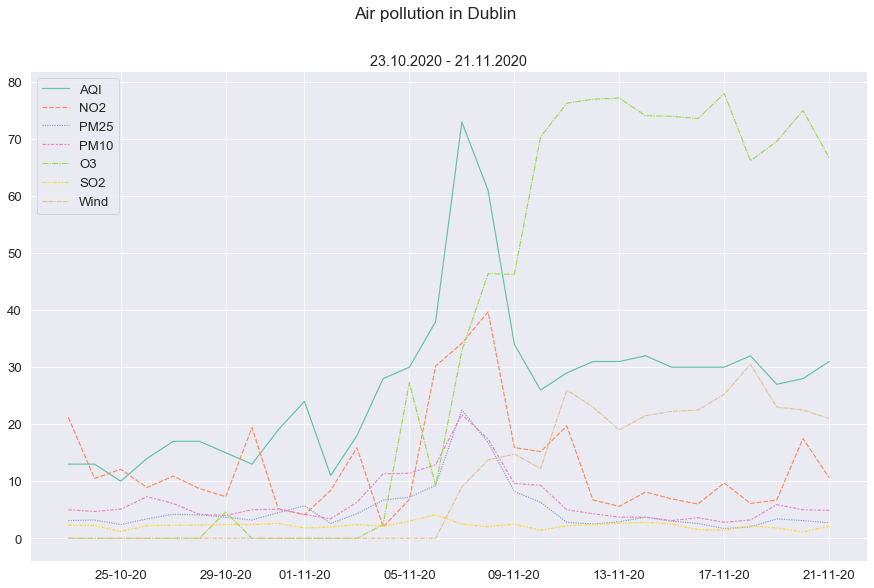

In [11]:
# Plot the data.
register_matplotlib_converters()
fig, ax = plt.subplots()
fig.suptitle("Air pollution in Dublin")

sns.lineplot(data=df,ax=ax).set_title("23.10.2020 - 21.11.2020")

# Makes the x axis display well.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))

# Show the plot.
plt.show()

### Simulation of a data set.

In [12]:
# Get an instance of generator.
gen = np.random.default_rng()

In fitting data on air pollution, there are many acceptable distribution models depending on the areas of study. Among the most used distributions are: 
* **gamma**, 
* **lognormal**,
* **Weibull**. 

[](https://www.researchgate.net/publication/329267591_Fitting_Statistical_Distribution_on_Air_Pollution_An_Overview)

### Plotting.